<h1><center>CSE391 programming for data science</center></h1>

<h1><center>Lecture 21</center></h1>
<h1><center>April 23 ,2018 </center></h1>




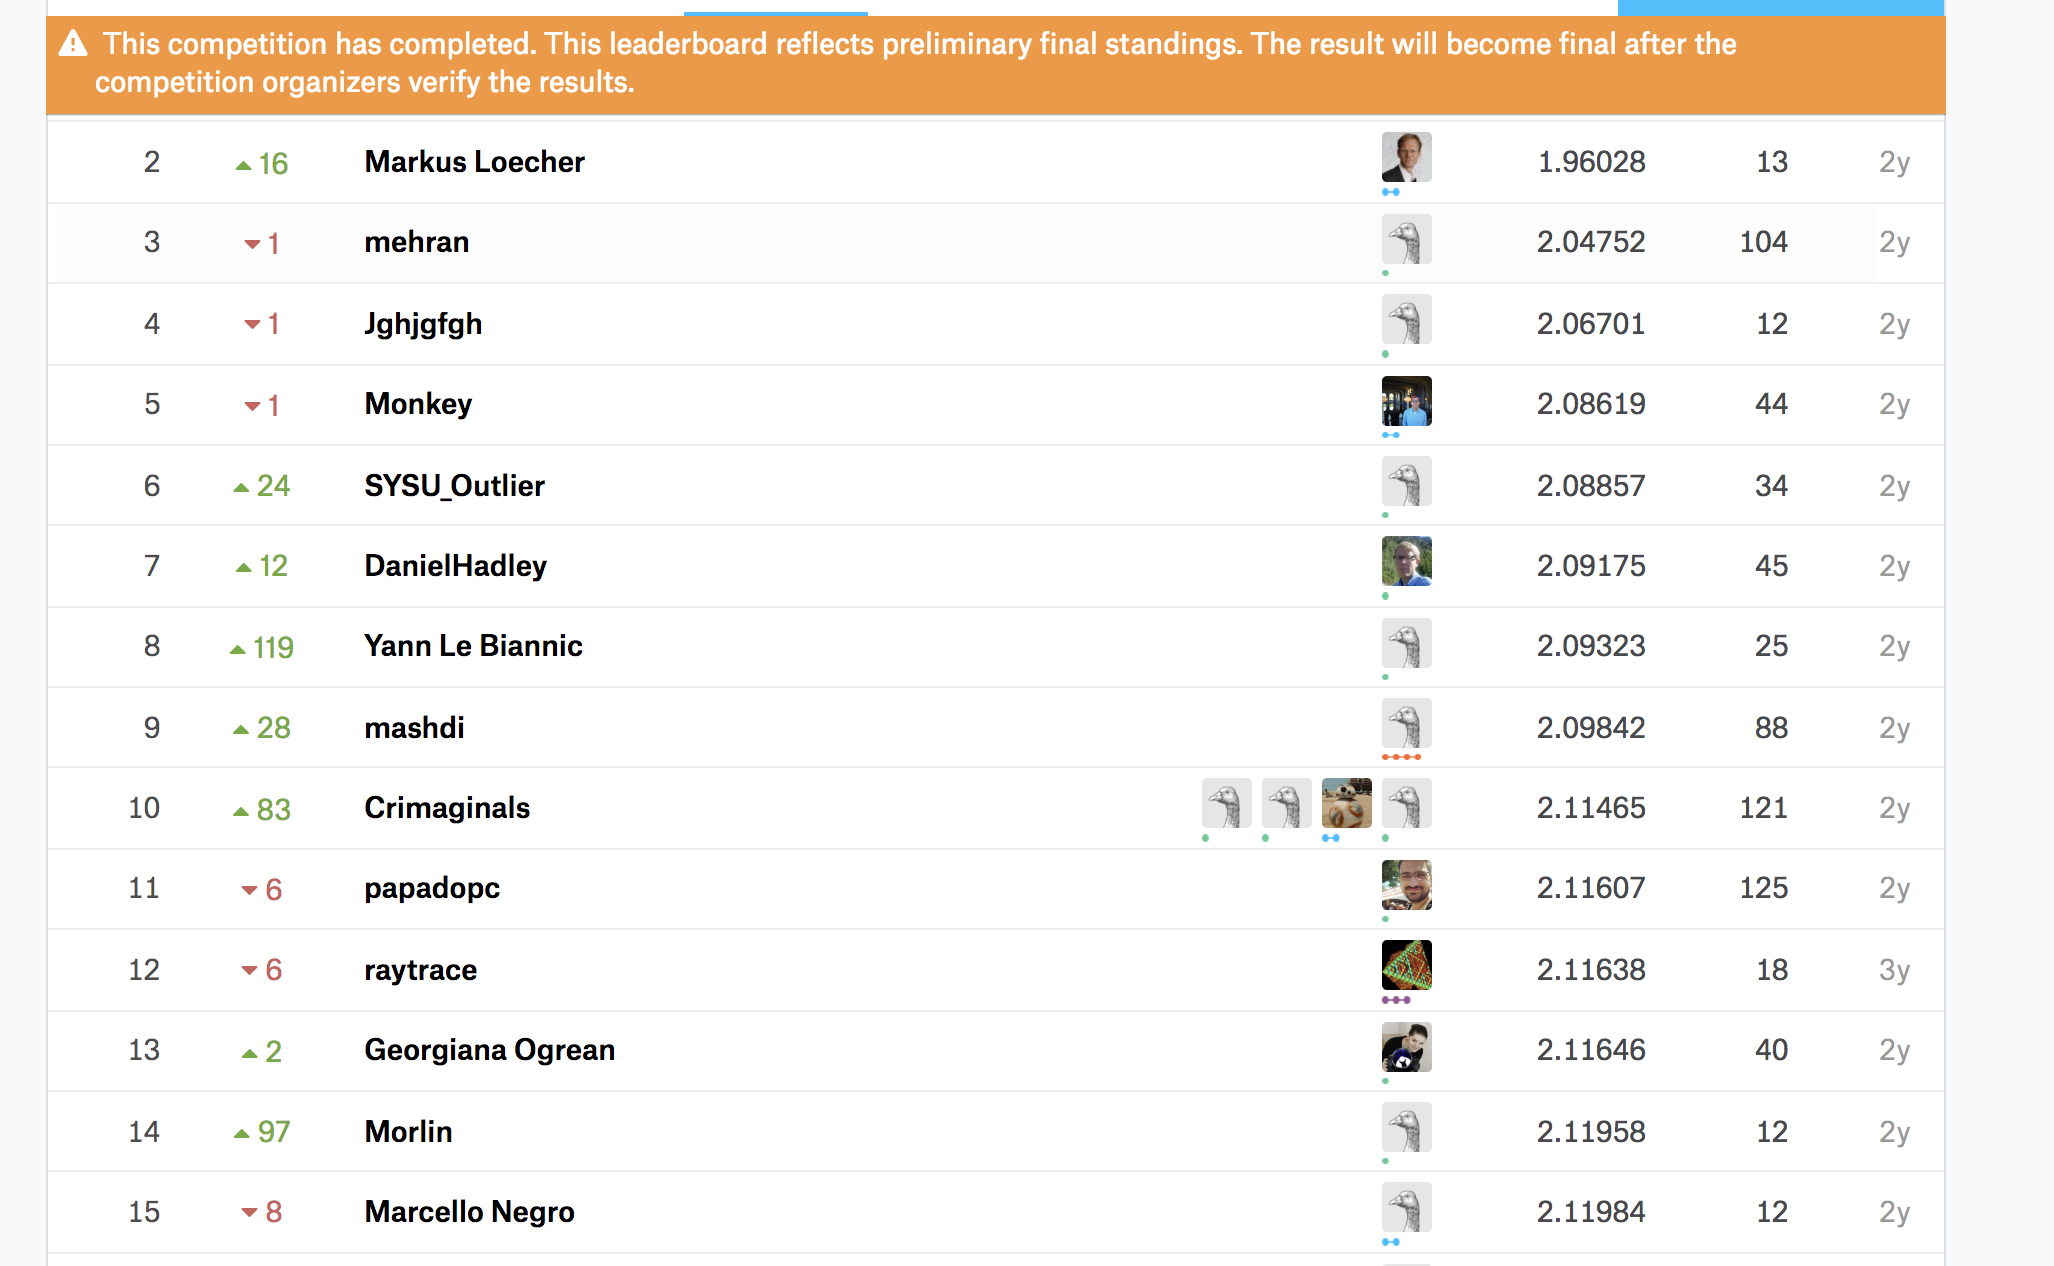

# log-loss function: Kaggle metric for many competitions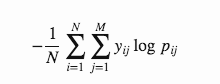


# Generalized linear regression
## 1- Ridge regression (penality norm 2)
## 2- Lasso (penalty norm 1)
## 3- Elastic Net (Ridge+ Lasso)

# LASSO regression
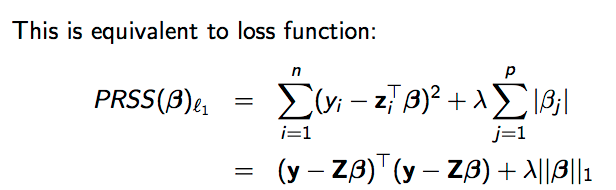


# LASSO provides a sparse solution
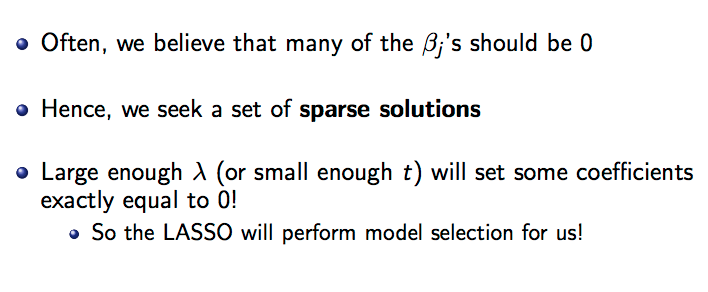
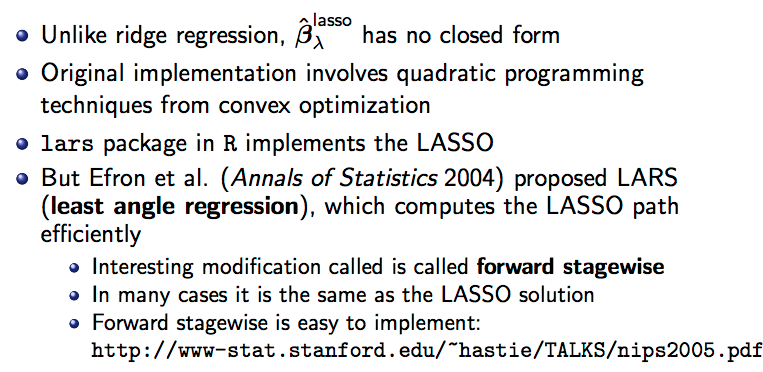

# Similar to Ridge regression we can use cross validation as described above to estimate parameter $\huge \lambda$ (norm 1 penality). Let's see the below example that shows how to select the LASSO parameters using  cross validation

# Example
###  cross-validation to select an optimal value of the regularization parameter alpha of the Lasso estimator.




# A description of dataset we use


From Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499, we have

"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

Automatically created module for IPython interactive environment
Computing regularization path using the coordinate descent lasso...


(2300, 3800)

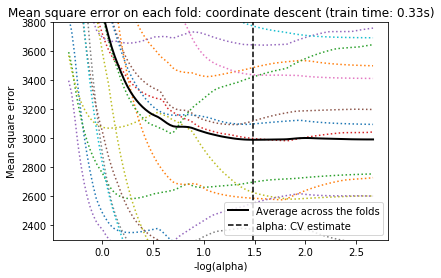

In [63]:
print(__doc__)

# Author: Olivier Grisel, Gael Varoquaux, Alexandre Gramfort
# License: BSD 3 clause

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

# #############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

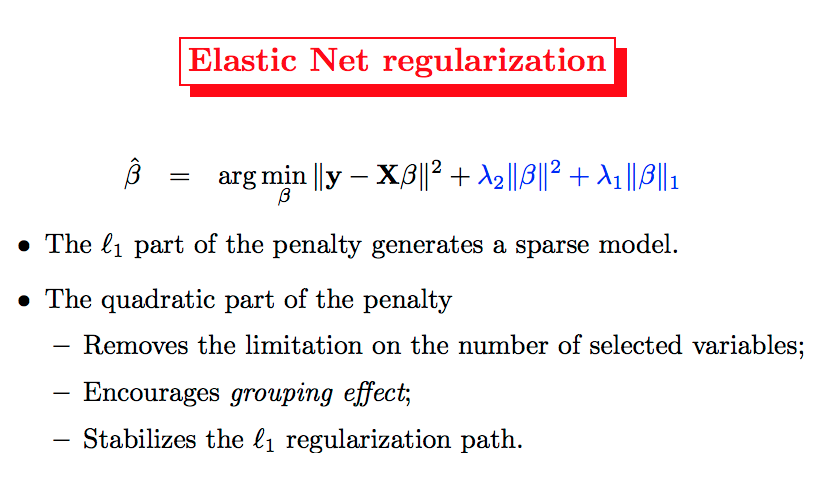

# Elastic net regression combined L1 norms (LASSO) and L2 norms (ridge regression) into a penalized model for generalized linear regression. This gives it sparsity (L1) and robustness (L2) properties.


# class sklearn.linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)


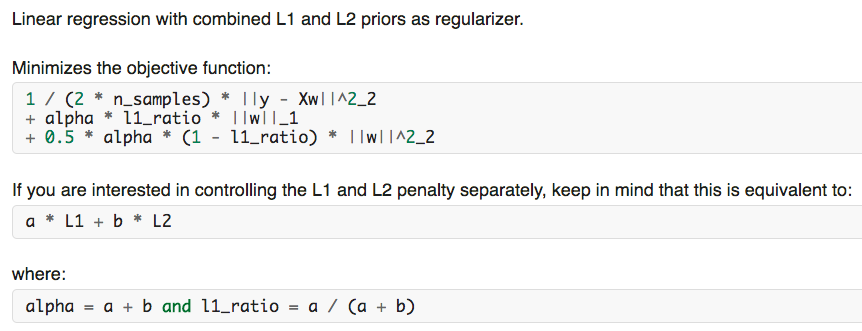

Automatically created module for IPython interactive environment
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.385982
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.240498


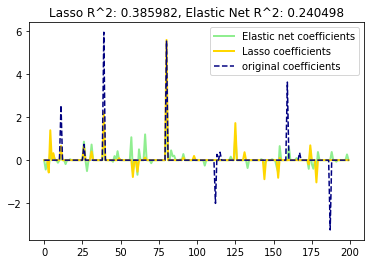

In [72]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

# #############################################################################
# Generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features)
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0  # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

# #############################################################################
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

# #############################################################################
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

# Understanding the Bias-Variance Tradeoff
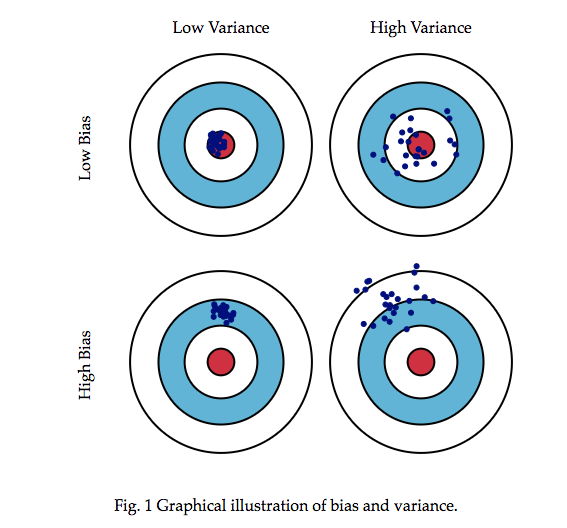

# Tensorflow

## Built to do efficient numerical computation in Python similar to Numpy

## But unlike Numpy that suffers from a lot of overhead from switching back to Python every operation, TensorFlow lets us describe a graph of interacting operations that run entirely outside Python

## The role of the Python code is therefore to build this external computation graph, and to dictate which parts of the computation graph should be run.




# Computational Graphs

A computational graph is a series of TensorFlow operations arranged into a graph of nodes.


- Building the computational graph.
- Running the computational graph.


## Example: make a computational graph for the followoing operation:

$e = (a+b)*(b+1)$


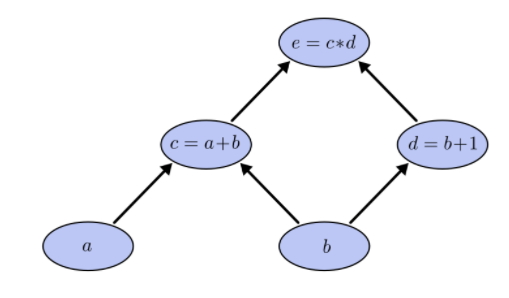

In [46]:
# import tensorflow
import tensorflow as tf
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1, node2) # does not print out 3, and 4

Tensor("Const_4:0", shape=(), dtype=float32) Tensor("Const_5:0", shape=(), dtype=float32)


- We need to run the computational graph in a session as follows:

In [48]:

sess = tf.Session()
print(sess.run([node1, node2]))

[3.0, 4.0]


- we can add our two constant nodes and produce a new graph as follows



In [49]:
node3 = tf.add(node1, node2)
print("node3: ", node3)
print("sess.run(node3): ",sess.run(node3))

node3:  Tensor("Add_3:0", shape=(), dtype=float32)
sess.run(node3):  7.0


 # A placeholder is a promise to provide a value later.
 
 
 ## a bit like a function or a lambda

In [50]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # + provides a shortcut for tf.add(a, b)

- We can evaluate this graph with multiple inputs by using the feed_dict parameter to specify Tensors 

In [51]:
print(sess.run(adder_node, {a: 3, b:4.5}))
print(sess.run(adder_node, {a: [1,3], b: [2, 4]}))

7.5
[ 3.  7.]


## Example: let's build a simple regression model and learn the parameters using Tensorflow

1- We need to create some variables.
 Variables allow us to add trainable parameters to a graph. They are constructed with a type and initial value:

In [ ]:
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = tf.placeholder(tf.float32)

- Build the linear model

In [52]:
linear_model = W * x + b

- To initialize all the variables in a TensorFlow program, you must explicitly call a special operation as follows:

In [53]:
init = tf.global_variables_initializer()
sess.run(init)

- compute the output:

In [54]:
print(sess.run(linear_model, {x:[1,2,3,4]}))

[ 0.          0.30000001  0.60000002  0.90000004]


- let's compute the model error for a given input

In [55]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

23.66


### Solving the simple regression model using the gradient descent algorithm in Tensorflow

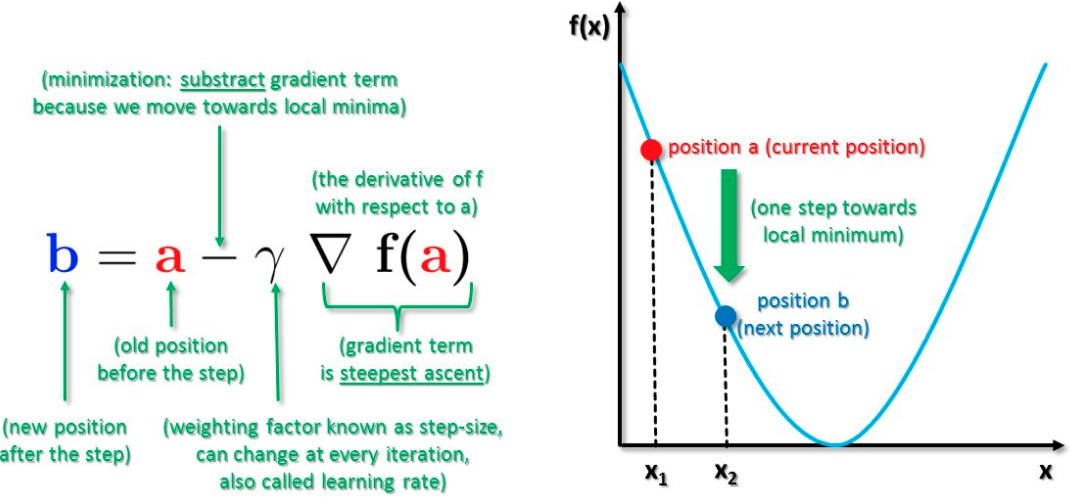

[SRC](http://www.big-data.tips/gradient-descent)


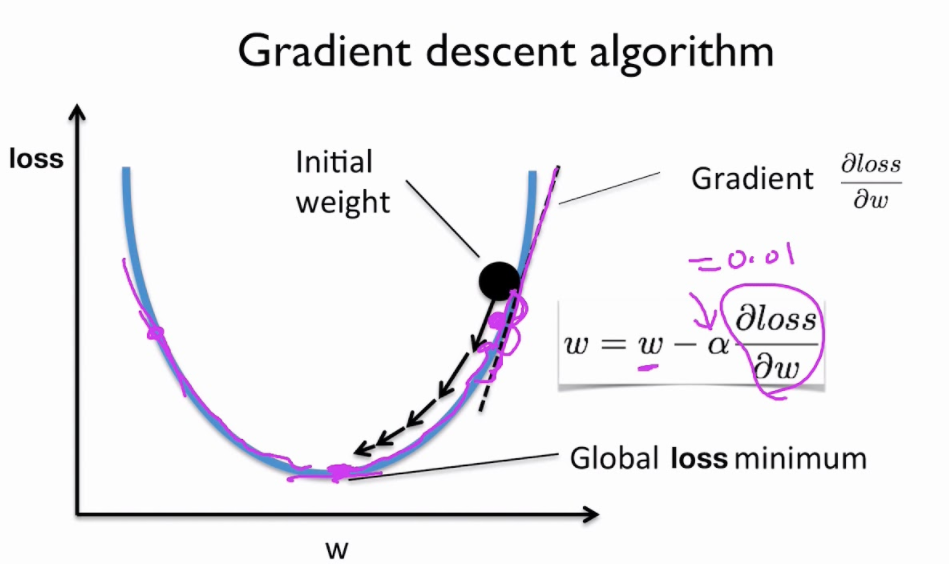



In [59]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
sess.run(init) # reset values to incorrect defaults.
for i in range(1000):
  sess.run(train, {x:[1,2,3,4], y:[0,-1,-2,-3]})

print(sess.run([W, b]))

[array([-0.9999969], dtype=float32), array([ 0.99999082], dtype=float32)]


## Computational graph of the above example
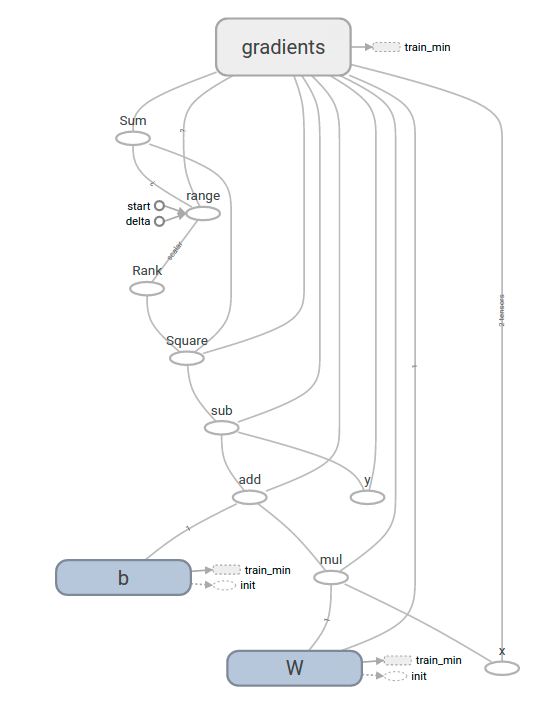

# Classification  Using Neural Networks

## Most widely used neural networks:
### Feedforward Neural Network 
### Radial basis function Neural Network
### Kohonen Self Organizing Neural Network
### Recurrent Neural Network(RNN) – Long Short Term Memory
### Convolutional Neural Network
###  Modular Neural Network

# Feedforward Neural Network
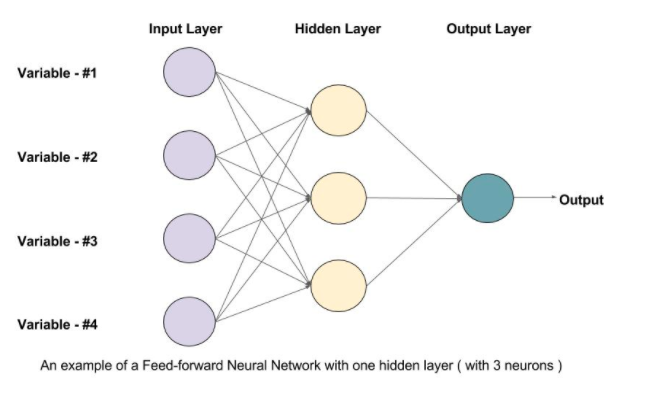

# components of a neural network:

## Neuron: a basic unit of neural networks

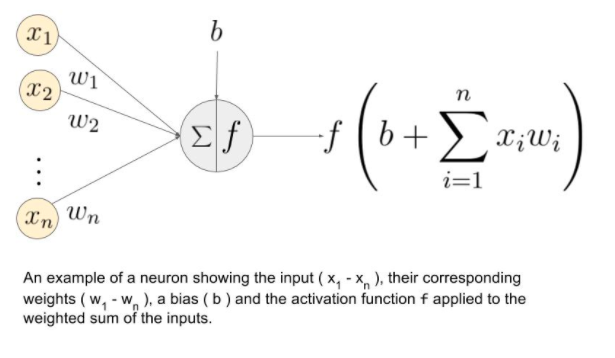


## Activation Functions:

### Sigmoid
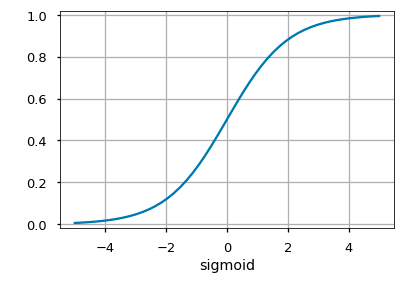
### Tanh
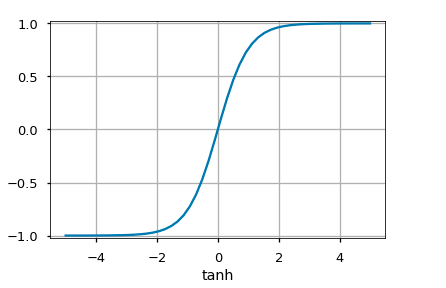
### Rectified Linear Unit (ReLU)
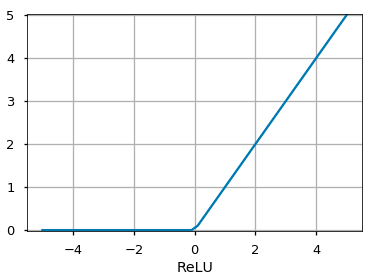

## Input Layer
- the first layer of a neural network. It is used to provide the input data or features to the network.

## Output Layer
-  The activation function to be used in this layer is different for different problems. For a binary classification problem, we want the output to be either 0 or 1. Thus, a sigmoid activation function is used. For a Multiclass classification problem, a Softmax ( think of it as a generalization of sigmoid to multiple classes ) is used. For a regression problem, where the output is not a predefined category, we can simply use a linear unit.

### soft mask function at the output layer for the multi-class case:
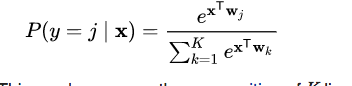
## Hidden layer
-The hidden layers' job is to transform the inputs into something that the output layer can use.



# Example

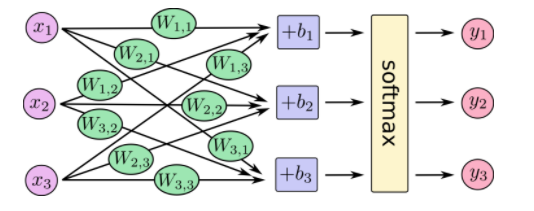

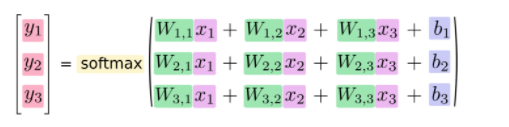

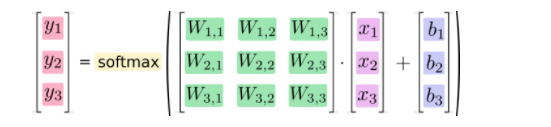

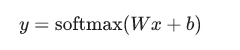

# How to train a neural network: 
## Backpropagation

In [58]:
# Implementation of a simple MLP network with one hidden layer. Tested on the iris data set.
# Requires: numpy, sklearn>=0.18.1, tensorflow>=1.0

# NOTE: In order to make the code simple, we rewrite x * W_1 + b_1 = x' * W_1'
# where x' = [x | 1] and W_1' is the matrix W_1 appended with a new row with elements b_1's.
# Similarly, for h * W_2 + b_2
import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)


def init_weights(shape):
    """ Weight initialization """
    weights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(weights)

def forwardprop(X, w_1, w_2):
    """
    Forward-propagation.
    IMPORTANT: yhat is not softmax since TensorFlow's softmax_cross_entropy_with_logits() does that internally.
    """
    h    = tf.nn.sigmoid(tf.matmul(X, w_1))  # The \sigma function
    yhat = tf.matmul(h, w_2)  # The \varphi function
    return yhat

def get_iris_data():
    """ Read the iris data set and split them into training and test sets """
    iris   = datasets.load_iris()
    data   = iris["data"]
    target = iris["target"]

    # Prepend the column of 1s for bias
    N, M  = data.shape
    all_X = np.ones((N, M + 1))
    all_X[:, 1:] = data

    # Convert into one-hot vectors
    num_labels = len(np.unique(target))
    all_Y = np.eye(num_labels)[target]  # One liner trick!
    return train_test_split(all_X, all_Y, test_size=0.33, random_state=RANDOM_SEED)

def main():
    train_X, test_X, train_y, test_y = get_iris_data()

    # Layer's sizes
    x_size = train_X.shape[1]   # Number of input nodes: 4 features and 1 bias
    h_size = 256                # Number of hidden nodes
    y_size = train_y.shape[1]   # Number of outcomes (3 iris flowers)

    # Symbols
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])

    # Weight initializations
    w_1 = init_weights((x_size, h_size))
    w_2 = init_weights((h_size, y_size))

    # Forward propagation
    yhat    = forwardprop(X, w_1, w_2)
    predict = tf.argmax(yhat, axis=1)

    # Backward propagation
    cost    = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
    updates = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

    # Run SGD
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(100):
        # Train with each example
        for i in range(len(train_X)):
            sess.run(updates, feed_dict={X: train_X[i: i + 1], y: train_y[i: i + 1]})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: train_X, y: train_y}))
        test_accuracy  = np.mean(np.argmax(test_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: test_X, y: test_y}))

        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
              % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))

    sess.close()

if __name__ == '__main__':
    main()

Epoch = 1, train accuracy = 58.00%, test accuracy = 62.00%
Epoch = 2, train accuracy = 65.00%, test accuracy = 70.00%
Epoch = 3, train accuracy = 65.00%, test accuracy = 70.00%
Epoch = 4, train accuracy = 66.00%, test accuracy = 70.00%
Epoch = 5, train accuracy = 70.00%, test accuracy = 70.00%
Epoch = 6, train accuracy = 70.00%, test accuracy = 74.00%
Epoch = 7, train accuracy = 72.00%, test accuracy = 78.00%
Epoch = 8, train accuracy = 78.00%, test accuracy = 78.00%
Epoch = 9, train accuracy = 81.00%, test accuracy = 78.00%
Epoch = 10, train accuracy = 83.00%, test accuracy = 78.00%
Epoch = 11, train accuracy = 85.00%, test accuracy = 78.00%
Epoch = 12, train accuracy = 87.00%, test accuracy = 78.00%
Epoch = 13, train accuracy = 87.00%, test accuracy = 78.00%
Epoch = 14, train accuracy = 88.00%, test accuracy = 82.00%
Epoch = 15, train accuracy = 88.00%, test accuracy = 82.00%
Epoch = 16, train accuracy = 88.00%, test accuracy = 82.00%
Epoch = 17, train accuracy = 88.00%, test accurac